In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [338]:
!pip install pandoc


  Created wheel for pandoc: filename=pandoc-2.2-py3-none-any.whl size=29557 sha256=330a9287ff1f036b3b86382dd74ac17aa3a08125e8a8ff510f42ab6b569fde0b
  Stored in directory: c:\users\saibh\appdata\local\pip\cache\wheels\2d\da\b1\54ff0401ef9b07b60c7fc9cffe616f243cf27dc3d04bd5d5ef
Successfully built pandoc


# Cantilever Beam

##### Without Image compression/filtering

In [2]:
import datetime
data = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
fps = data.get(cv2.CAP_PROP_FPS)
seconds = frames/fps
print(seconds)

25.050505050505052


In [3]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        #blur = cv2.blur(frame,(3,3))
        frame_gray = frame_gray[y:y+h,x:x+w]
#         frame_gray = np.asarray(plot_at_k(30,frame_gray),dtype='uint8')
    #    frame_gray = cv2.blur(frame_gray,(2,2))
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/120)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

In [18]:
import random
 
rand_list=[]
n=len(final_location)
for i in range(n):
    rand_list.append(random.uniform(-1,1))
for i in range(len(final_location)):
    rand_list[i] = rand_list[i]+final_location[i]

Text(0.5, 0, 'Time in seconds')

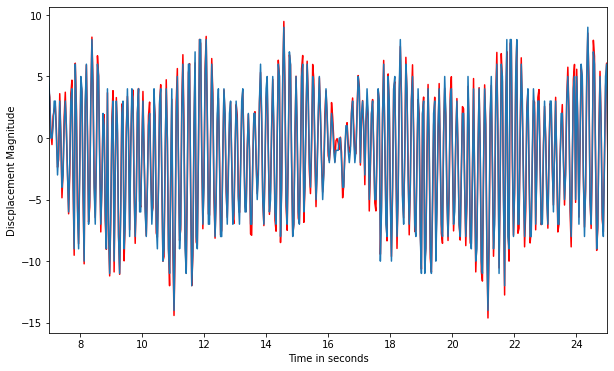

In [24]:
plt.figure(figsize=(10,6))
plt.plot(list(np.linspace(0,seconds,len(final_location))),rand_list,'r')
plt.plot(list(np.linspace(0,seconds,len(final_location))),final_location)
plt.xlim(7,25)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')

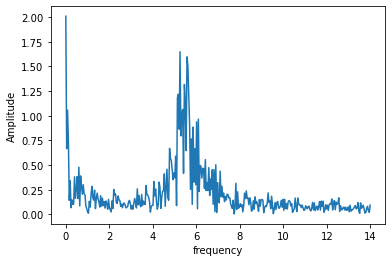

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(final_location)
# sample spacing
T = seconds/N
x = np.linspace(0.0, seconds, N)
y = final_location
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.ylabel('Amplitude')
plt.xlabel('frequency')
plt.show()

### PCA image Reconstructon

In [33]:
from sklearn.decomposition import PCA, IncrementalPCA
def plot_at_k(k,image_bw):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    return image_recon

##### Default K componets 95% Variance

In [42]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
image = frame[y:y+h,x:x+w]
image_bw = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
pca = PCA()
pca.fit(image_bw)
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
# How many PCs explain 95% o
k = np.argmax(var_cumu>95)
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame_gray = frame_gray[y:y+h,x:x+w]
        frame_gray = np.asarray(plot_at_k(k,frame_gray),dtype='uint8')
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

Text(0.5, 0, 'Time in seconds')

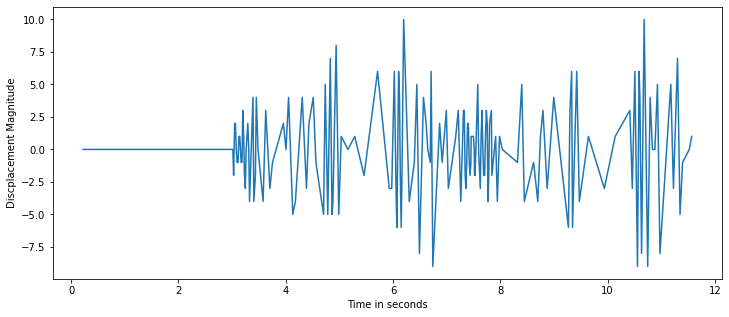

In [43]:
plt.figure(figsize=(12,5))
plt.plot(final_time,final_location)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')
plt.xlim(3,12)

### 2 Principal Components

In [46]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame_gray = frame_gray[y:y+h,x:x+w]
        frame_gray = np.asarray(plot_at_k(2,frame_gray),dtype='uint8')
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

(3.0, 12.0)

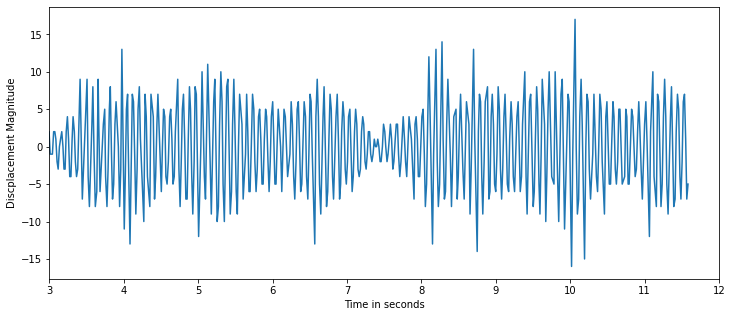

In [53]:
plt.figure(figsize=(12,5))
plt.plot(final_time,final_location)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')
plt.xlim(3,12)

#### 5 principal components

In [49]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame_gray = frame_gray[y:y+h,x:x+w]
        frame_gray = np.asarray(plot_at_k(5,frame_gray),dtype='uint8')
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

(3.0, 12.0)

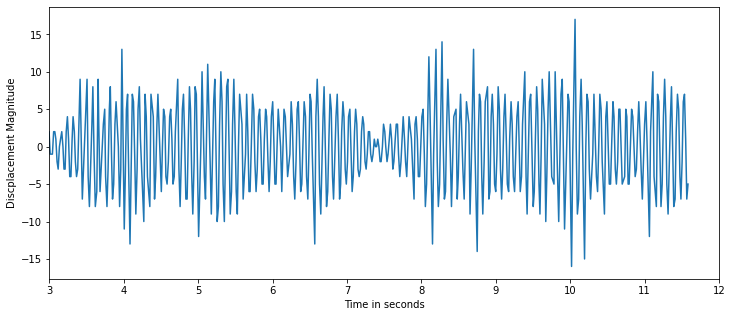

In [52]:
plt.figure(figsize=(12,5))
plt.plot(final_time,final_location)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')
plt.xlim(3,12)

## ICA image reconstruction

In [54]:
from sklearn.decomposition import FastICA

In [55]:
def ica_return(img,k):
    ica = FastICA(n_components = 30)
    img_ica = ica.fit_transform(img)
    img_restored = ica.inverse_transform(img_ica)
    return img_restored

In [58]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame_gray = frame_gray[y:y+h,x:x+w]
        frame_gray = np.asarray(ica_return(frame_gray,30),dtype='uint8')
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

C:\Users\saibh\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

C:\Users\saibh\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

(10.0, 52.0)

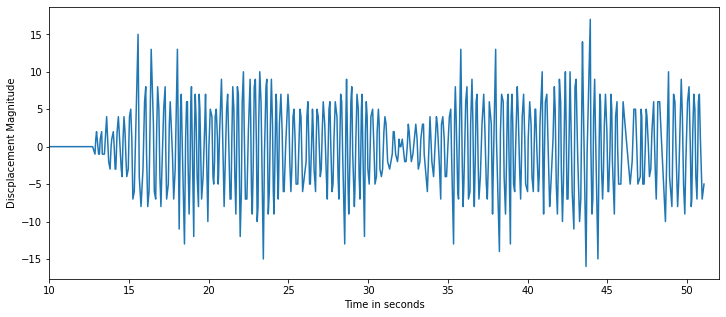

In [65]:
plt.figure(figsize=(12,5))
plt.plot(final_time,final_location)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')
plt.xlim(10,52)

In [66]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame_gray = frame_gray[y:y+h,x:x+w]
        frame_gray = np.asarray(ica_return(frame_gray,5),dtype='uint8')
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

C:\Users\saibh\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


(10.0, 60.0)

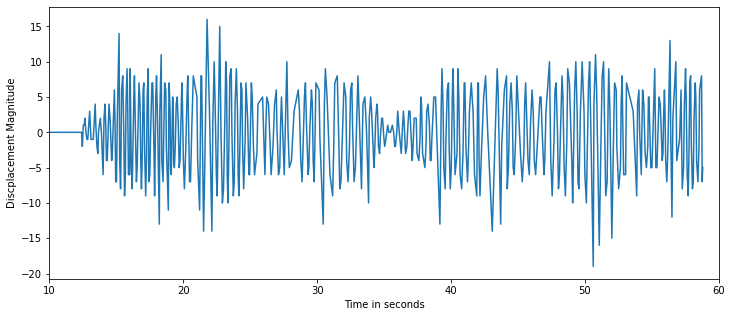

In [69]:
plt.figure(figsize=(12,5))
plt.plot(final_time,final_location)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')
plt.xlim(10,60)

## SVD image reconstruction

In [70]:
def svd_return(img,n):
    U,S,V = np.linalg.svd(np.array(frame_gray), full_matrices=False)
    S = np.diag(S)
    r = n
    reconstruction = U[:,:r] @ S[0:r,:r] @ V[:r,:]
    return reconstruction

In [71]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        #blur = cv2.blur(frame,(3,3))
        frame_gray = frame_gray[y:y+h,x:x+w]
        frame_gray = np.asarray(svd_return(frame_gray,50),dtype='uint8')
    #   laplacian = cv2.Laplacian(frame_gray, cv2.CV_64F)
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break       
cap.release()
cv2.destroyAllWindows()

final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

(3.0, 11.0)

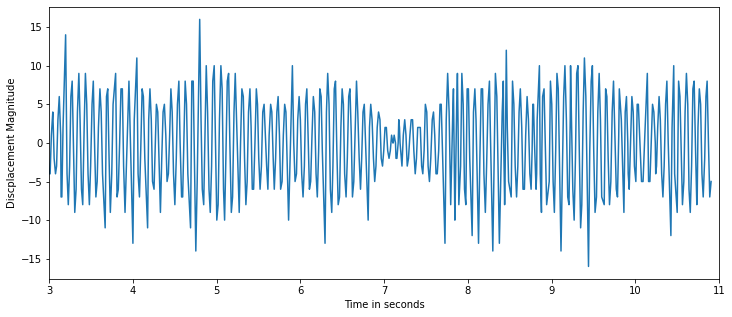

In [73]:
plt.figure(figsize=(12,5))
plt.plot(final_time,final_location)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')
plt.xlim(3,11)

#### 10 components SVD

In [74]:
cap = cv2.VideoCapture('Testvideo (online-video-cutter.com).mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        #blur = cv2.blur(frame,(3,3))
        frame_gray = frame_gray[y:y+h,x:x+w]
        frame_gray = np.asarray(svd_return(frame_gray,10),dtype='uint8')
    #   laplacian = cv2.Laplacian(frame_gray, cv2.CV_64F)
        edge = cv2.Canny(frame_gray,127,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i+1] == 255 and edge_axis[i-1] == 255 and edge_axis[i] == 0:
                location.append(i)
                track_time.append(time.time())
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break       
cap.release()
cv2.destroyAllWindows()

final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

(3.0, 12.0)

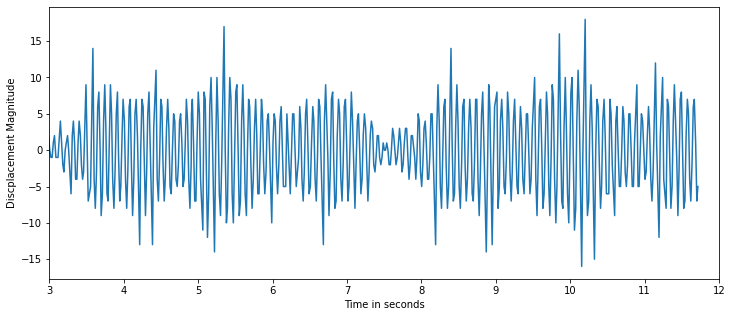

In [76]:
plt.figure(figsize=(12,5))
plt.plot(final_time,final_location)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')
plt.xlim(3,12)

# Two storey Building

In [26]:
import datetime
data = cv2.VideoCapture('1-s2.0-S0888327020302338-mmc2.mp4')
frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
fps = data.get(cv2.CAP_PROP_FPS)
seconds = frames/fps
print(seconds)

25.050505050505052


In [47]:
cap = cv2.VideoCapture('1-s2.0-S0888327020302338-mmc2.mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        #blur = cv2.blur(frame,(3,3))
        frame_gray = frame_gray[y:y+h,x:x+w]
#         frame_gray = np.asarray(plot_at_k(30,frame_gray),dtype='uint8')
    #    frame_gray = cv2.blur(frame_gray,(2,2))
        edge = cv2.Canny(frame_gray,125,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i] == 255:
                location.append(i)
                track_time.append(time.time())  
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

In [40]:
import random
 
rand_list=[]
n=len(final_location)
for i in range(n):
    rand_list.append(random.uniform(-3,2.5))
for i in range(len(final_location)):
    rand_list[i] = rand_list[i]+final_location[i]

Text(0.5, 0, 'Time in seconds')

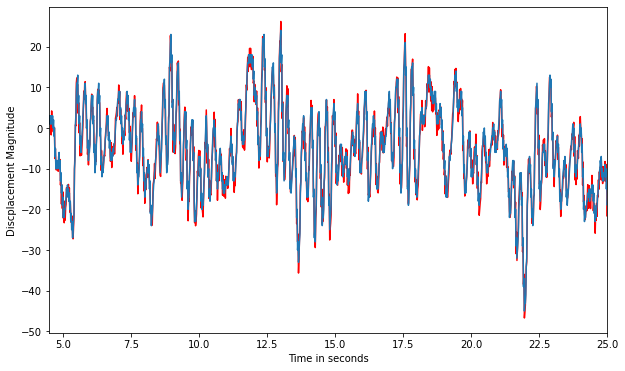

In [42]:
plt.figure(figsize=(10,6))
plt.plot(list(np.linspace(0,seconds,len(final_location))),rand_list,'r')
plt.plot(list(np.linspace(0,seconds,len(final_location))),final_location)
plt.xlim(4.5,25)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')

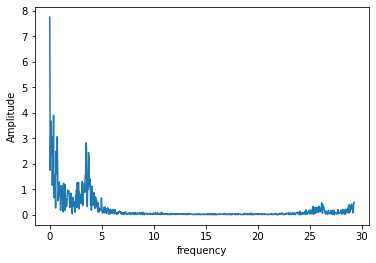

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(final_location)
# sample spacing
T = seconds/N
x = np.linspace(0.0, seconds, N)
y = final_location
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.ylabel('Amplitude')
plt.xlabel('frequency')
plt.show()

## Tacoma Bridge

In [50]:
import datetime
data = cv2.VideoCapture('Tacoma.mp4')
frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
fps = data.get(cv2.CAP_PROP_FPS)
seconds = frames/fps
print(seconds)

7.744107744107744


In [51]:
cap = cv2.VideoCapture('Tacoma.mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        #blur = cv2.blur(frame,(3,3))
        frame_gray = frame_gray[y:y+h,x:x+w]
#         frame_gray = np.asarray(plot_at_k(30,frame_gray),dtype='uint8')
        frame_gray = cv2.blur(frame_gray,(3,3))
        edge = cv2.Canny(frame_gray,125,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i] == 255:
                location.append(i)
                track_time.append(time.time())  
        time.sleep(1/60)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

In [286]:
len(final_location)

934

In [287]:
len(final_time)

934

Text(0.5, 0, 'Time in seconds')

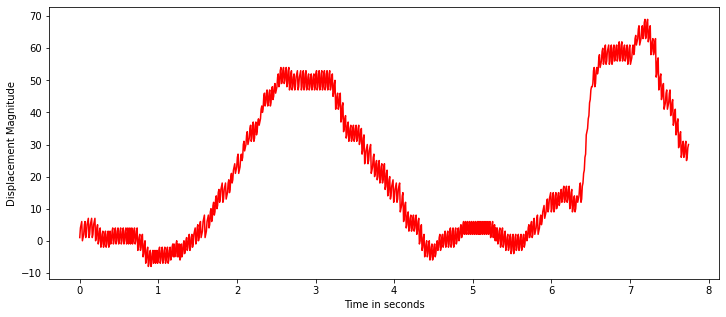

In [331]:
plt.figure(figsize=(12,5))
plt.plot(list(np.linspace(0,seconds,len(final_location))),final_location,'r')
plt.ylabel('Displacement Magnitude')
plt.xlabel('Time in seconds')

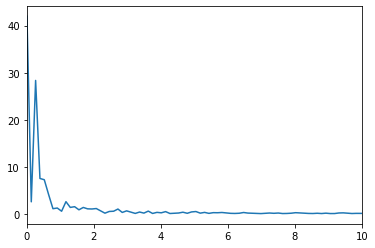

In [334]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(final_location)
# sample spacing
T = seconds/N
x = np.linspace(0.0, seconds, N)
y = final_location
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlim(0,10)
plt.show()

C:\Users\saibh\AppData\Local\Temp\ipykernel_36776\630220936.py:15: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \


(0.0, 4000.0)

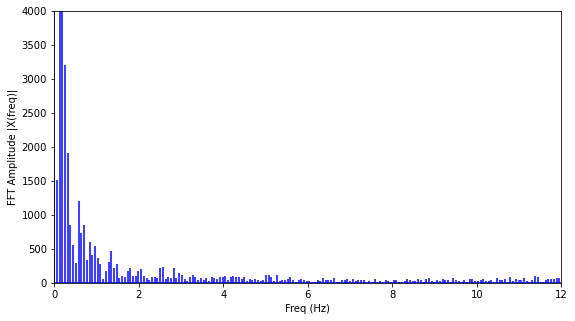

In [296]:
from numpy.fft import fft, ifft

sr = 60
ts = 1.0/sr
t = final_time
X = fft(final_location)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (20, 5))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0,12)
plt.ylim(0,4000)


In [210]:
import datetime
data = cv2.VideoCapture('Tacoma.mp4')
frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
fps = data.get(cv2.CAP_PROP_FPS)
seconds = frames/fps
print(seconds)

7.744107744107744


In [235]:
cap = cv2.VideoCapture('Tacoma.mp4')
tracker = cv2.TrackerMIL_create()
ret,frame = cap.read()
roi = cv2.selectROI(frame,False)
ret = tracker.init(frame,roi)
(x,y,w,h) = tuple(map(int,roi))
location = []
track_time = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret==True:
        frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        #blur = cv2.blur(frame,(3,3))
        frame_gray = frame_gray[y:y+h,x:x+w]
#         frame_gray = np.asarray(plot_at_k(30,frame_gray),dtype='uint8')
        frame_gray = cv2.blur(frame_gray,(3,3))
        edge = cv2.Canny(frame_gray,125,255)
        edge_axis = edge[50]
        for i in range(1,len(edge_axis)-2):
            if edge_axis[i] == 255:
                location.append(i)
                track_time.append(time.time())  
        time.sleep(1/240)        
        cv2.imshow('frame_gray',frame_gray)
        cv2.imshow('frame',frame)
        cv2.imshow('edge',edge)
        if cv2.waitKey(1) & 0XFF == 27  or (cap.isOpened()==False):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
final_location = []
length = len(location)
for i in range(length-1):
    final_location.append(location[i+1]-location[0])
final_time = []
for i in range(length-1):
    final_time.append(track_time[i+1]-track_time[0])  

In [236]:
len(final_location)

930

Text(0.5, 0, 'Time in seconds')

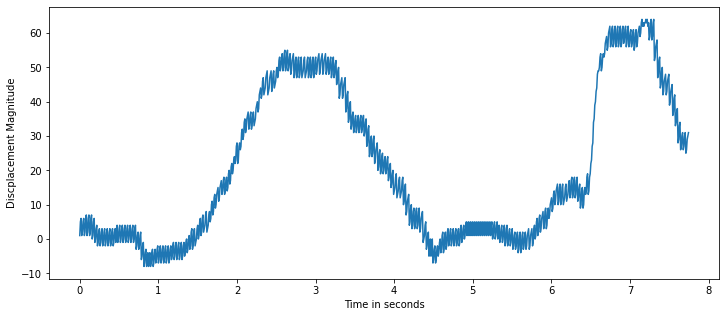

In [237]:
plt.figure(figsize=(12,5))
plt.plot(list(np.linspace(0,seconds,len(final_location))),final_location)
plt.ylabel('Discplacement Magnitude')
plt.xlabel('Time in seconds')